In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

train_df = pd.read_csv("F:\Programming\DataScience\SimpliLearn\Mod3_MachineLearning\project3\\train.csv")
test_df = pd.read_csv("F:\Programming\DataScience\SimpliLearn\Mod3_MachineLearning\project3\\test.csv")

In [2]:
train_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
test_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [4]:
print("Shape of train dataset: {}\nShape of test dataset: {}".format(train_df.shape, test_df.shape))

Shape of train dataset: (9557, 143)
Shape of test dataset: (23856, 142)


In [5]:
concat_features = test_df.columns.tolist() + train_df.columns.tolist()

In [6]:
def find_dup(arr, n):
  dup_count = []
  unique_count = []
  for i in range(len(arr)):
    match_count = 0
    for j in range(len(arr)):
      if i!=j:
        if arr[i] == arr[j]:
          match_count += 1

    if match_count >= n:
      dup_count.append(arr[i])       
    else: unique_count.append(arr[i])
  return dup_count, unique_count 

dup, unique = find_dup(concat_features, 1)
print("Independent feature: {}".format(set(dup)))
print("Dependent feature: {}".format(set(unique)))

Independent feature: {'age', 'SQBhogar_nin', 'tipovivi5', 'parentesco9', 'parentesco10', 'instlevel2', 'r4t1', 'sanitario2', 'sanitario1', 'instlevel4', 'etecho3', 'pisomoscer', 'lugar6', 'pisonatur', 'computer', 'instlevel7', 'r4m3', 'elimbasu5', 'hogar_total', 'tipovivi2', 'epared1', 'paredfibras', 'Id', 'SQBovercrowding', 'tipovivi1', 'noelec', 'television', 'paredblolad', 'estadocivil7', 'qmobilephone', 'elimbasu1', 'bedrooms', 'parentesco1', 'eviv3', 'estadocivil5', 'mobilephone', 'pisoother', 'SQBmeaned', 'paredzocalo', 'pisomadera', 'parentesco8', 'elimbasu4', 'v18q', 'lugar3', 'instlevel9', 'hogar_adul', 'SQBedjefe', 'parentesco3', 'abastaguano', 'elimbasu3', 'elimbasu2', 'parentesco5', 'abastaguadentro', 'edjefe', 'sanitario3', 'dis', 'paredpreb', 'coopele', 'hhsize', 'techocane', 'lugar4', 'epared2', 'tipovivi3', 'lugar1', 'paredmad', 'escolari', 'instlevel1', 'parentesco4', 'instlevel8', 'r4t2', 'eviv1', 'SQBdependency', 'agesq', 'techootro', 'techozinc', 'energcocinar3', 'p

<p>The dependent feature is Target</p>

In [7]:
# Second problem is to find whether our data set is biased or not. For this let us first look the type of data our data set has

for col in train_df.columns:
  print("{} - {}".format(col, train_df[col].dtypes))

Id - object
v2a1 - float64
hacdor - int64
rooms - int64
hacapo - int64
v14a - int64
refrig - int64
v18q - int64
v18q1 - float64
r4h1 - int64
r4h2 - int64
r4h3 - int64
r4m1 - int64
r4m2 - int64
r4m3 - int64
r4t1 - int64
r4t2 - int64
r4t3 - int64
tamhog - int64
tamviv - int64
escolari - int64
rez_esc - float64
hhsize - int64
paredblolad - int64
paredzocalo - int64
paredpreb - int64
pareddes - int64
paredmad - int64
paredzinc - int64
paredfibras - int64
paredother - int64
pisomoscer - int64
pisocemento - int64
pisoother - int64
pisonatur - int64
pisonotiene - int64
pisomadera - int64
techozinc - int64
techoentrepiso - int64
techocane - int64
techootro - int64
cielorazo - int64
abastaguadentro - int64
abastaguafuera - int64
abastaguano - int64
public - int64
planpri - int64
noelec - int64
coopele - int64
sanitario1 - int64
sanitario2 - int64
sanitario3 - int64
sanitario5 - int64
sanitario6 - int64
energcocinar1 - int64
energcocinar2 - int64
energcocinar3 - int64
energcocinar4 - int64
elimb

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


<p>We have 143 features in our train_df, out of which:</p>
<ul>
  <li>8 columns are of float64 type</li>
  <li>130 columns are of int64 type</li>
  <li>5 columns are of object type</li>
</ul>
<p>We have 142 features in our test_df, out of which:</p>
<ul>
  <li>8 columns are of float64 type</li>
  <li>129 columns are of int64 type</li>
  <li>5 columns are of object type</li>
</ul>

In [10]:
# Let's first check which columns have high no. of null values

def null_counter(df):
  null_count_arr = []
  null_percent_arr = []

  for col in df.columns:
    null_count = df[col].isnull().sum()
    null_percent = round(null_count/df.shape[0]*100, 3)
    
    null_count_arr.append(null_count)
    null_percent_arr.append(null_percent)
  
  return (null_count_arr, null_percent_arr)

In [11]:
train_null_count, train_null_percent = null_counter(train_df)

data = {
  'Column_name': train_df.columns, 
  'Null_count': train_null_count, 
  'Null_percent': train_null_percent
}

null_info_df = pd.DataFrame.from_dict(data)

null_info_df

,Column_name,Null_count,Null_percent
0,Id,0,0.000
1,v2a1,6860,71.780
2,hacdor,0,0.000
3,rooms,0,0.000
4,hacapo,0,0.000
...,...,...,...
138,SQBovercrowding,0,0.000
139,SQBdependency,0,0.000
140,SQBmeaned,5,0.052
141,agesq,0,0.000


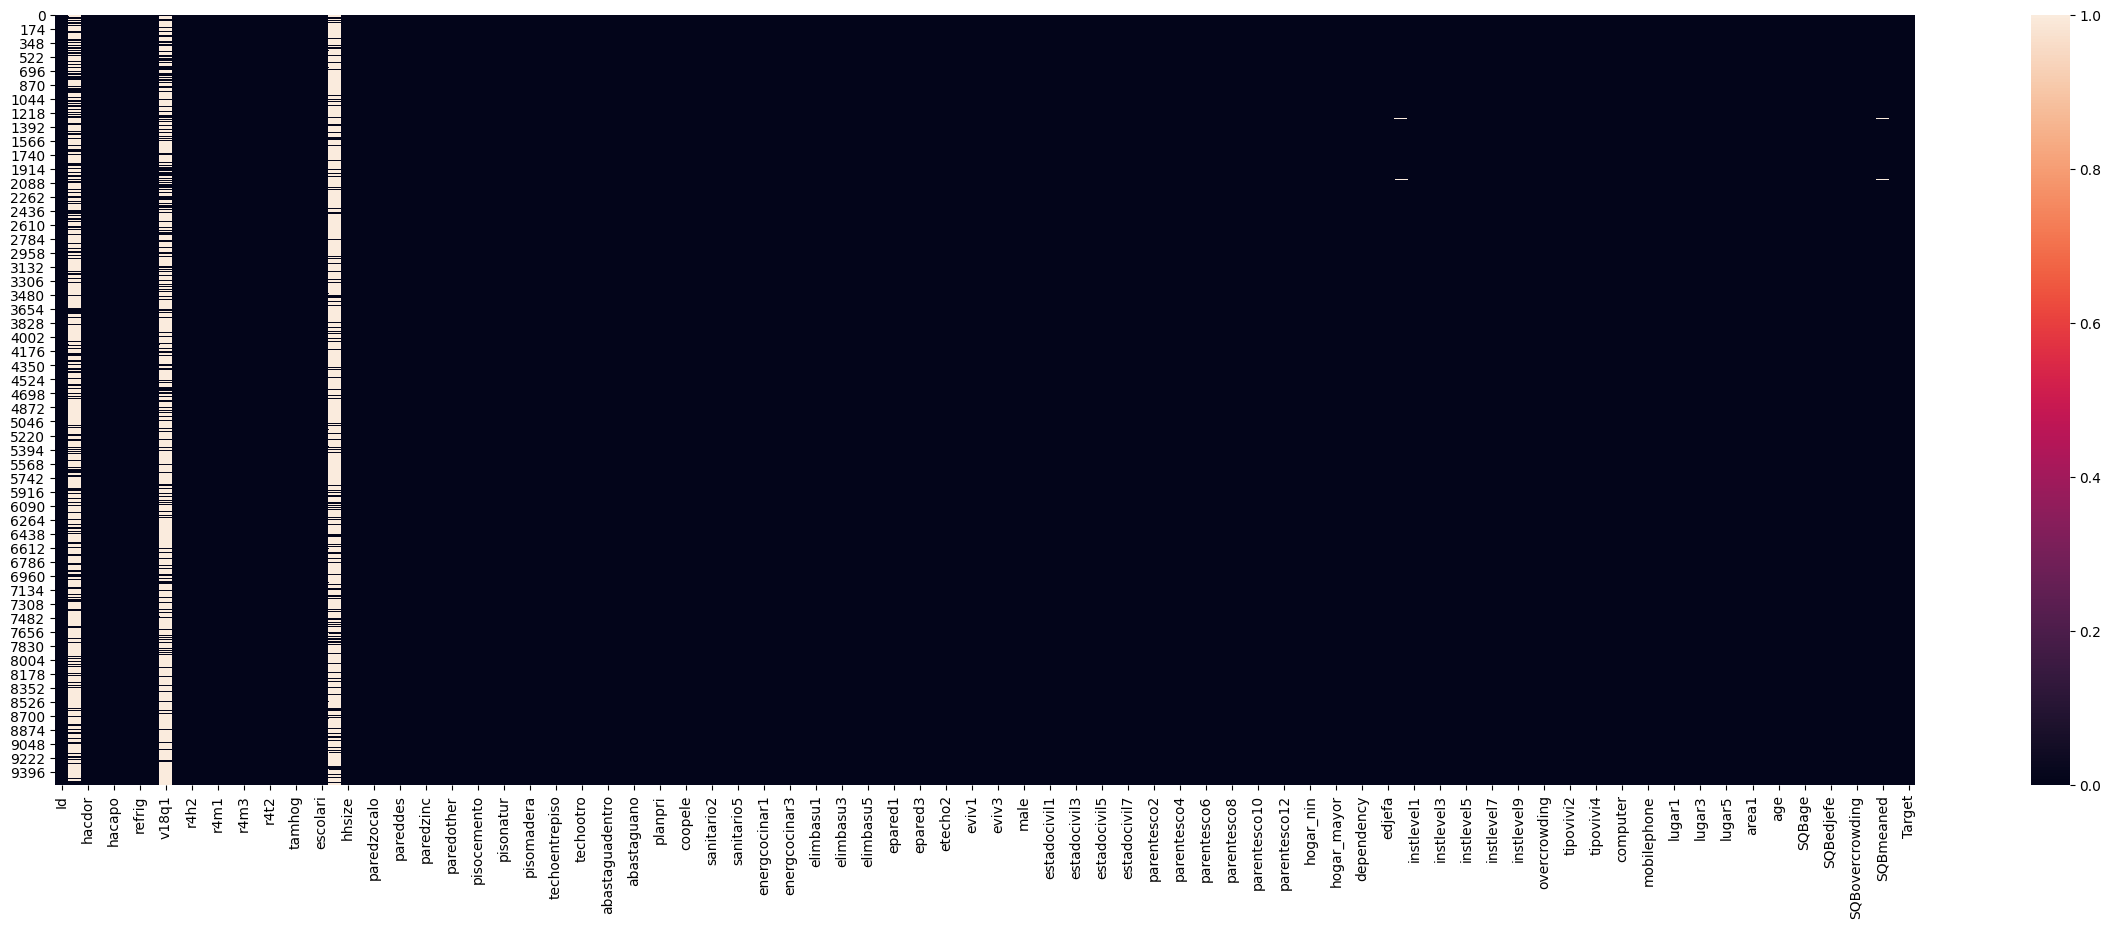

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 10))
sns.heatmap(train_df.isnull())
plt.show()

<p>From the above plot we can see that three features have high no. of null values. These features are:</p>
<ol>
  <li>v2a1 with 71.78%</li>
  <li>v18q1 with 76.82%</li>
  <li>rez_esc with 82.95%</li>
</ol>

<p>Since these three columns have high no. of missing values, hence, they will not contribute much to the model learning. So it would make no difference if we drop them.</p>


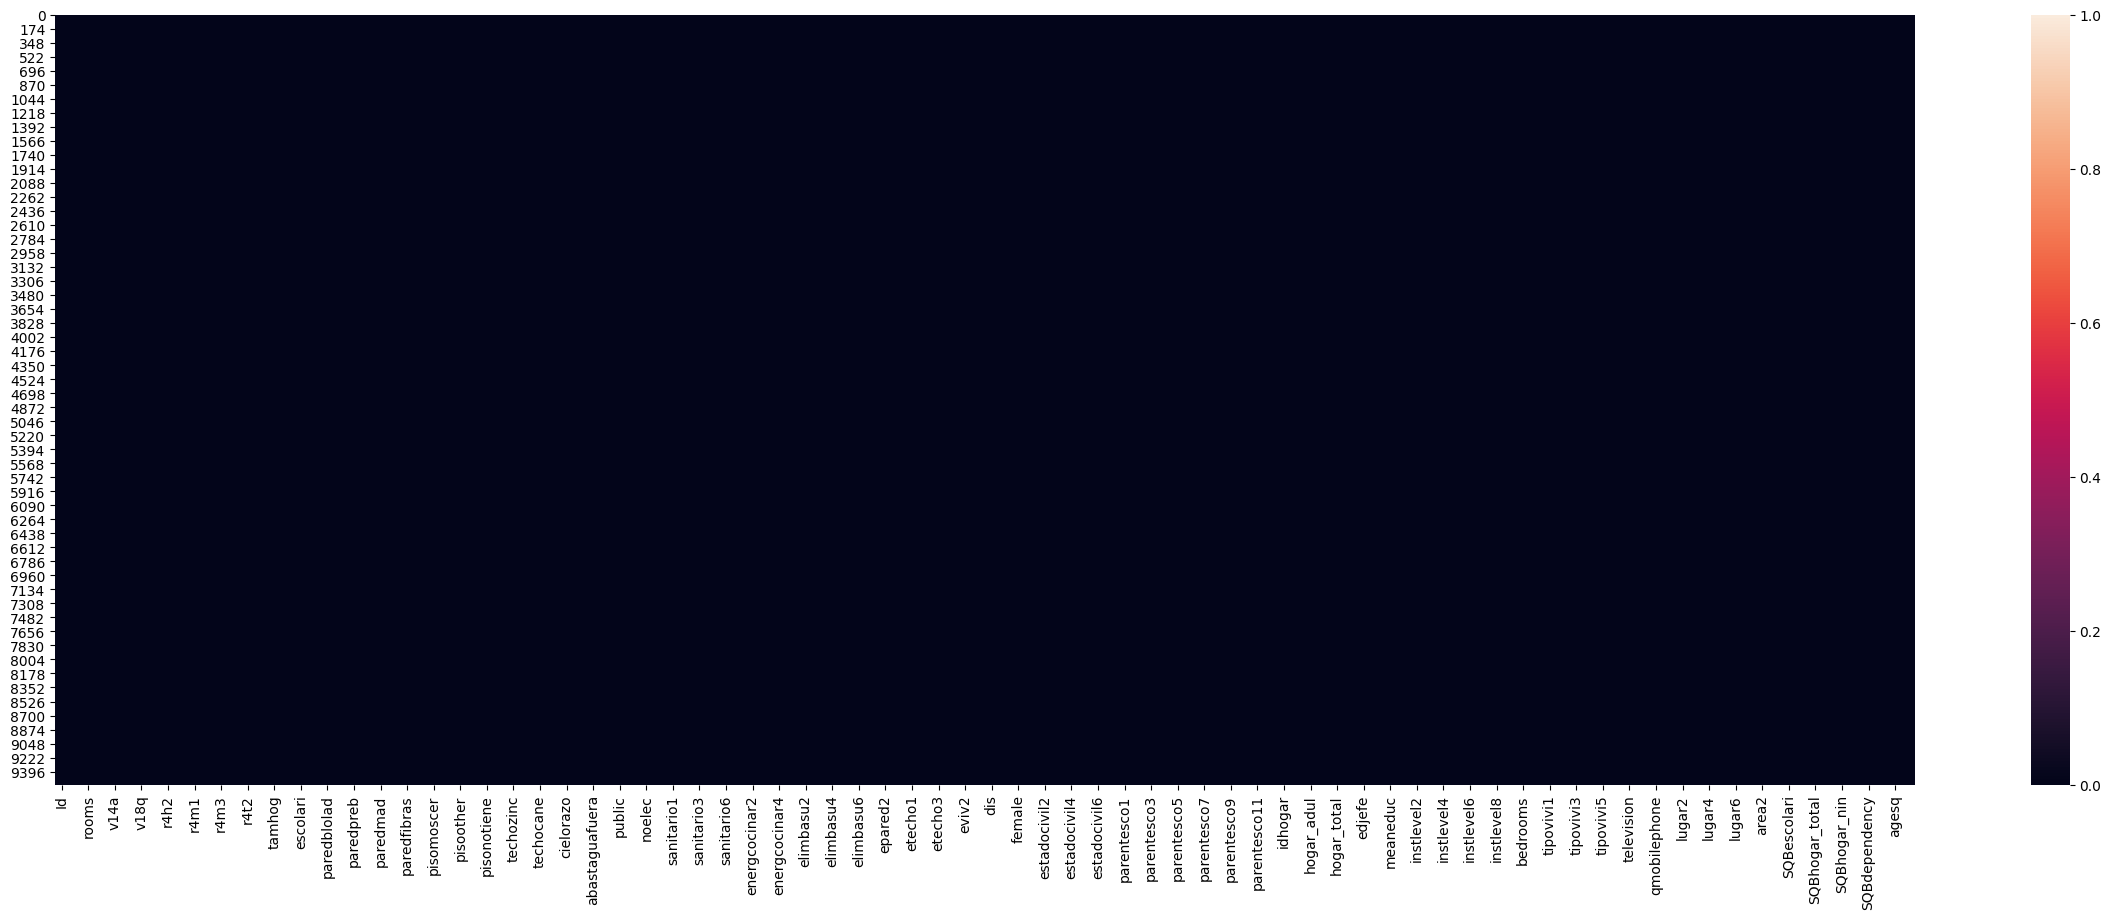

In [13]:
train_df = train_df.drop([ 'v2a1', 'v18q1', 'rez_esc'], axis=1)

plt.figure(figsize=(30, 10))
sns.heatmap(train_df.isnull())
plt.show()

In [14]:
has_head_df = train_df[['Id', 'idhogar', 'parentesco1']]
has_head_df

,Id,idhogar,parentesco1
0,ID_279628684,21eb7fcc1,1
1,ID_f29eb3ddd,0e5d7a658,1
2,ID_68de51c94,2c7317ea8,1
3,ID_d671db89c,2b58d945f,0
4,ID_d56d6f5f5,2b58d945f,0
...,...,...,...
9552,ID_d45ae367d,d6c086aa3,1
9553,ID_c94744e07,d6c086aa3,0
9554,ID_85fc658f8,d6c086aa3,0
9555,ID_ced540c61,d6c086aa3,0


In [15]:
hhold_head_count = has_head_df.groupby(['idhogar', 'parentesco1']).count()
hhold_head_count

Id
idhogar   parentesco1    
001ff74ca 0             1
          1             1
003123ec2 0             3
          1             1
004616164 0             1
...                    ..
ffae4a097 1             1
ffe90d46f 0             3
          1             1
fff7d6be1 0             3
          1             1

[5573 rows x 1 columns]

In [16]:
has_head_pv = pd.pivot_table(hhold_head_count, index='idhogar', columns='parentesco1', values='Id')
has_head_pv

parentesco1,0,1
idhogar,,
001ff74ca,1.0,1.0
003123ec2,3.0,1.0
004616164,1.0,1.0
004983866,1.0,1.0
005905417,2.0,1.0
...,...,...
ff9343a35,3.0,1.0
ff9d5ab17,2.0,1.0
ffae4a097,1.0,1.0


In [17]:
for id in has_head_pv.index:
  has_head_pv.loc[id, 1]

In [18]:
for id in has_head_pv.index:
  if has_head_pv.loc[id, 1] == 0:
    print(id)

# There is no house hold without a family head

In [19]:
pvty_lvl_df = train_df[['idhogar', 'Id', 'parentesco1', 'Target']]
pvty_lvl_df

,idhogar,Id,parentesco1,Target
0,21eb7fcc1,ID_279628684,1,4
1,0e5d7a658,ID_f29eb3ddd,1,4
2,2c7317ea8,ID_68de51c94,1,4
3,2b58d945f,ID_d671db89c,0,4
4,2b58d945f,ID_d56d6f5f5,0,4
...,...,...,...,...
9552,d6c086aa3,ID_d45ae367d,1,2
9553,d6c086aa3,ID_c94744e07,0,2
9554,d6c086aa3,ID_85fc658f8,0,2
9555,d6c086aa3,ID_ced540c61,0,2


In [20]:
x2 = pvty_lvl_df.groupby(['idhogar', 'Target', 'parentesco1'], as_index=False).count()
x2

,idhogar,Target,parentesco1,Id
0,001ff74ca,4,0,1
1,001ff74ca,4,1,1
2,003123ec2,2,0,3
3,003123ec2,2,1,1
4,004616164,2,0,1
...,...,...,...,...
5625,ffae4a097,4,1,1
5626,ffe90d46f,1,0,3
5627,ffe90d46f,1,1,1
5628,fff7d6be1,4,0,3


In [21]:
x2_idhogar_list = x2['idhogar'].tolist()

x2_dup, x2_unique = find_dup(x2_idhogar_list, 3)
print(f'Duplicate records: {x2_dup}\nUnique records: {x2_unique}')

Duplicate records: []
Unique records: ['001ff74ca', '001ff74ca', '003123ec2', '003123ec2', '004616164', '004616164', '004983866', '004983866', '005905417', '005905417', '006031de3', '006031de3', '006555fe2', '006555fe2', '00693f597', '00693f597', '006b64543', '006b64543', '00941f1f4', '00941f1f4', '009ae1cec', '009ae1cec', '00e3e05c5', '00e3e05c5', '00e443b00', '00edc0d0f', '00edc0d0f', '0108c62b8', '0108c62b8', '013962b12', '013962b12', '013e9ee6a', '013e9ee6a', '0172ab1d9', '0172ab1d9', '0172ab1d9', '0194d569d', '01c6fcb6e', '01d2e2b0b', '01d2e2b0b', '01ff6a086', '01ff6a086', '020713493', '023edfed0', '023edfed0', '0250e0b59', '0250e0b59', '027651991', '029f3d736', '029f3d736', '02a3da971', '02a3da971', '02ae50d8f', '02ae50d8f', '02e9bb4e7', '02e9bb4e7', '02f34e26c', '02f34e26c', '02ff93d1e', '02ff93d1e', '032d9f940', '032d9f940', '033c39c5c', '033c39c5c', '035bb4b72', '035bb4b72', '0369a5d78', '0369a5d78', '039745cbe', '039745cbe', '03b23f2b1', '03b23f2b1', '03c6bdf85', '03c78a7a9',

<p>All members are consistent with the poverty level of their head.</p>

In [22]:
# Now let's see biases in individual features. Let's first divide the dataset as per datatypes

float_features_df = train_df.select_dtypes('float64')
int_features_df = train_df.select_dtypes('int64')
obj_features_df = train_df.select_dtypes('object')

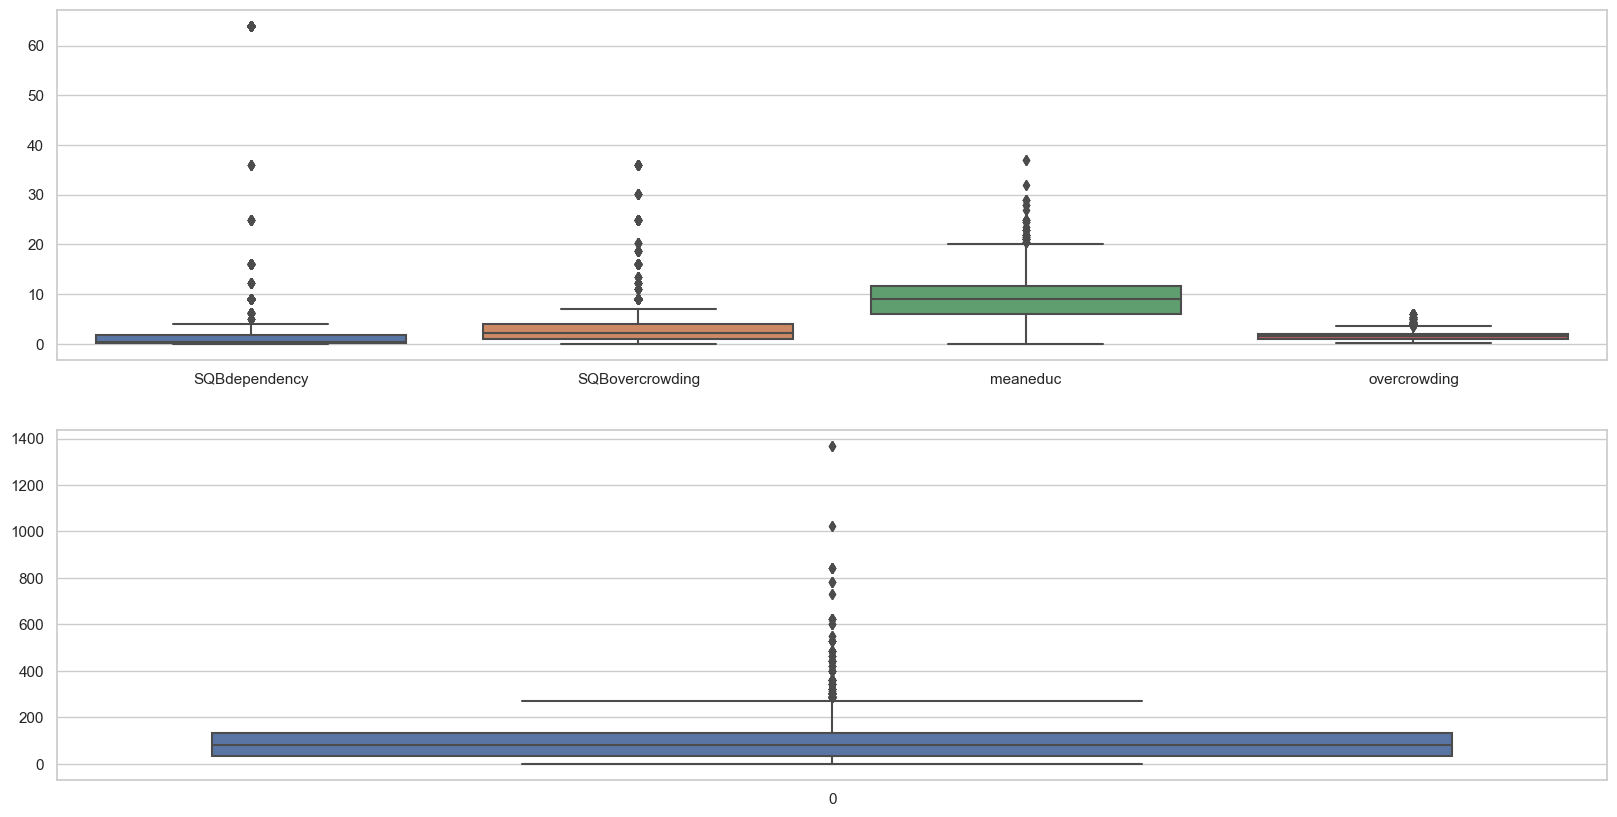

In [23]:
# boxplot of float features
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

df1 = float_features_df[float_features_df.columns.difference(['SQBmeaned'])]
sns.boxplot(data=df1, ax=ax[0])

sns.boxplot(data=train_df['SQBmeaned'], ax=ax[1])

plt.show()

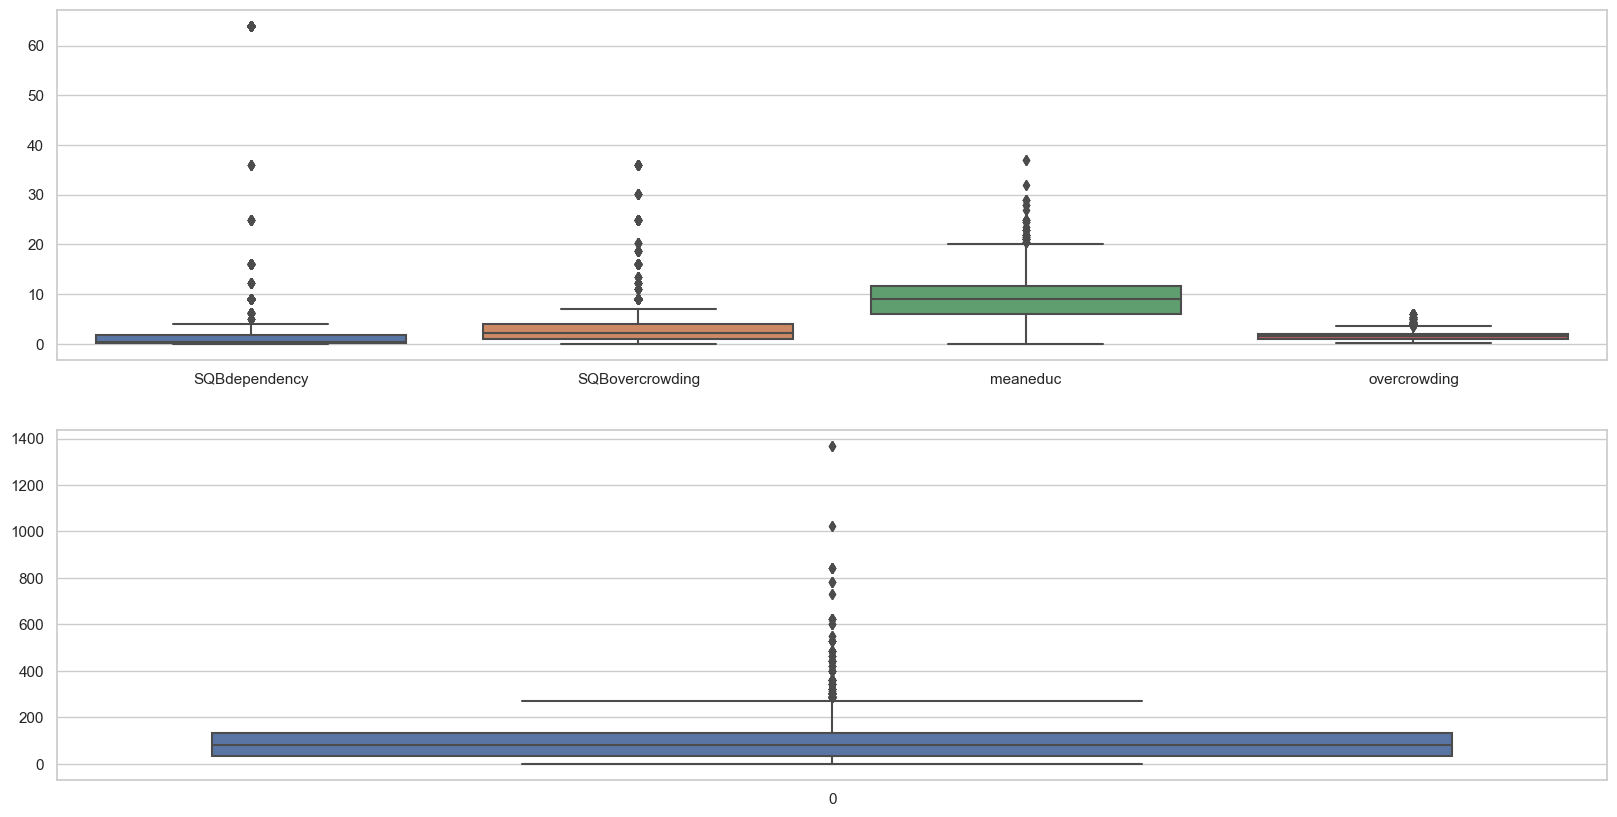

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

df1 = float_features_df[float_features_df.columns.difference(['SQBmeaned'])]
sns.boxplot(data=df1, ax=ax[0])

sns.boxplot(data=train_df['SQBmeaned'], ax=ax[1])

plt.show()

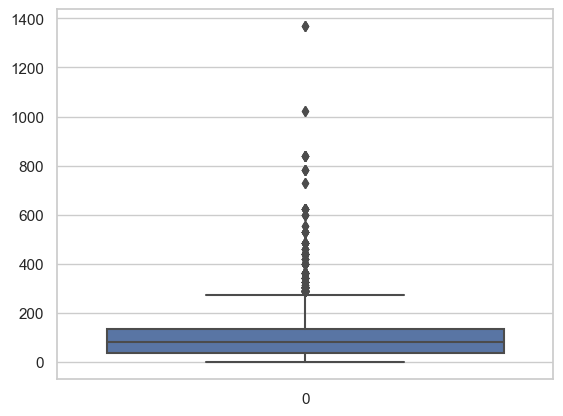

In [25]:
sns.boxplot(data=float_features_df['SQBmeaned'])
plt.show()

In [26]:
# There are certain int features which are one hot encoded. Let's differentiate them from other int features

def get_binary_features(df):
  binary_features_cols = []
  nonbinary_features_cols = []

  for col in df.columns:
    if df[col].min() == 0 and df[col].max() == 1:
      binary_features_cols.append(col)
    else:
      nonbinary_features_cols.append(col)

  return binary_features_cols, nonbinary_features_cols

x, y = get_binary_features(int_features_df) 

print(x)
print(y)

print("No. of binary features: {}".format(len(x)))
print("No. of non-binary features: {}".format(len(y)))

['hacdor', 'hacapo', 'v14a', 'refrig', 'v18q', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 'parentesco1', 'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco1

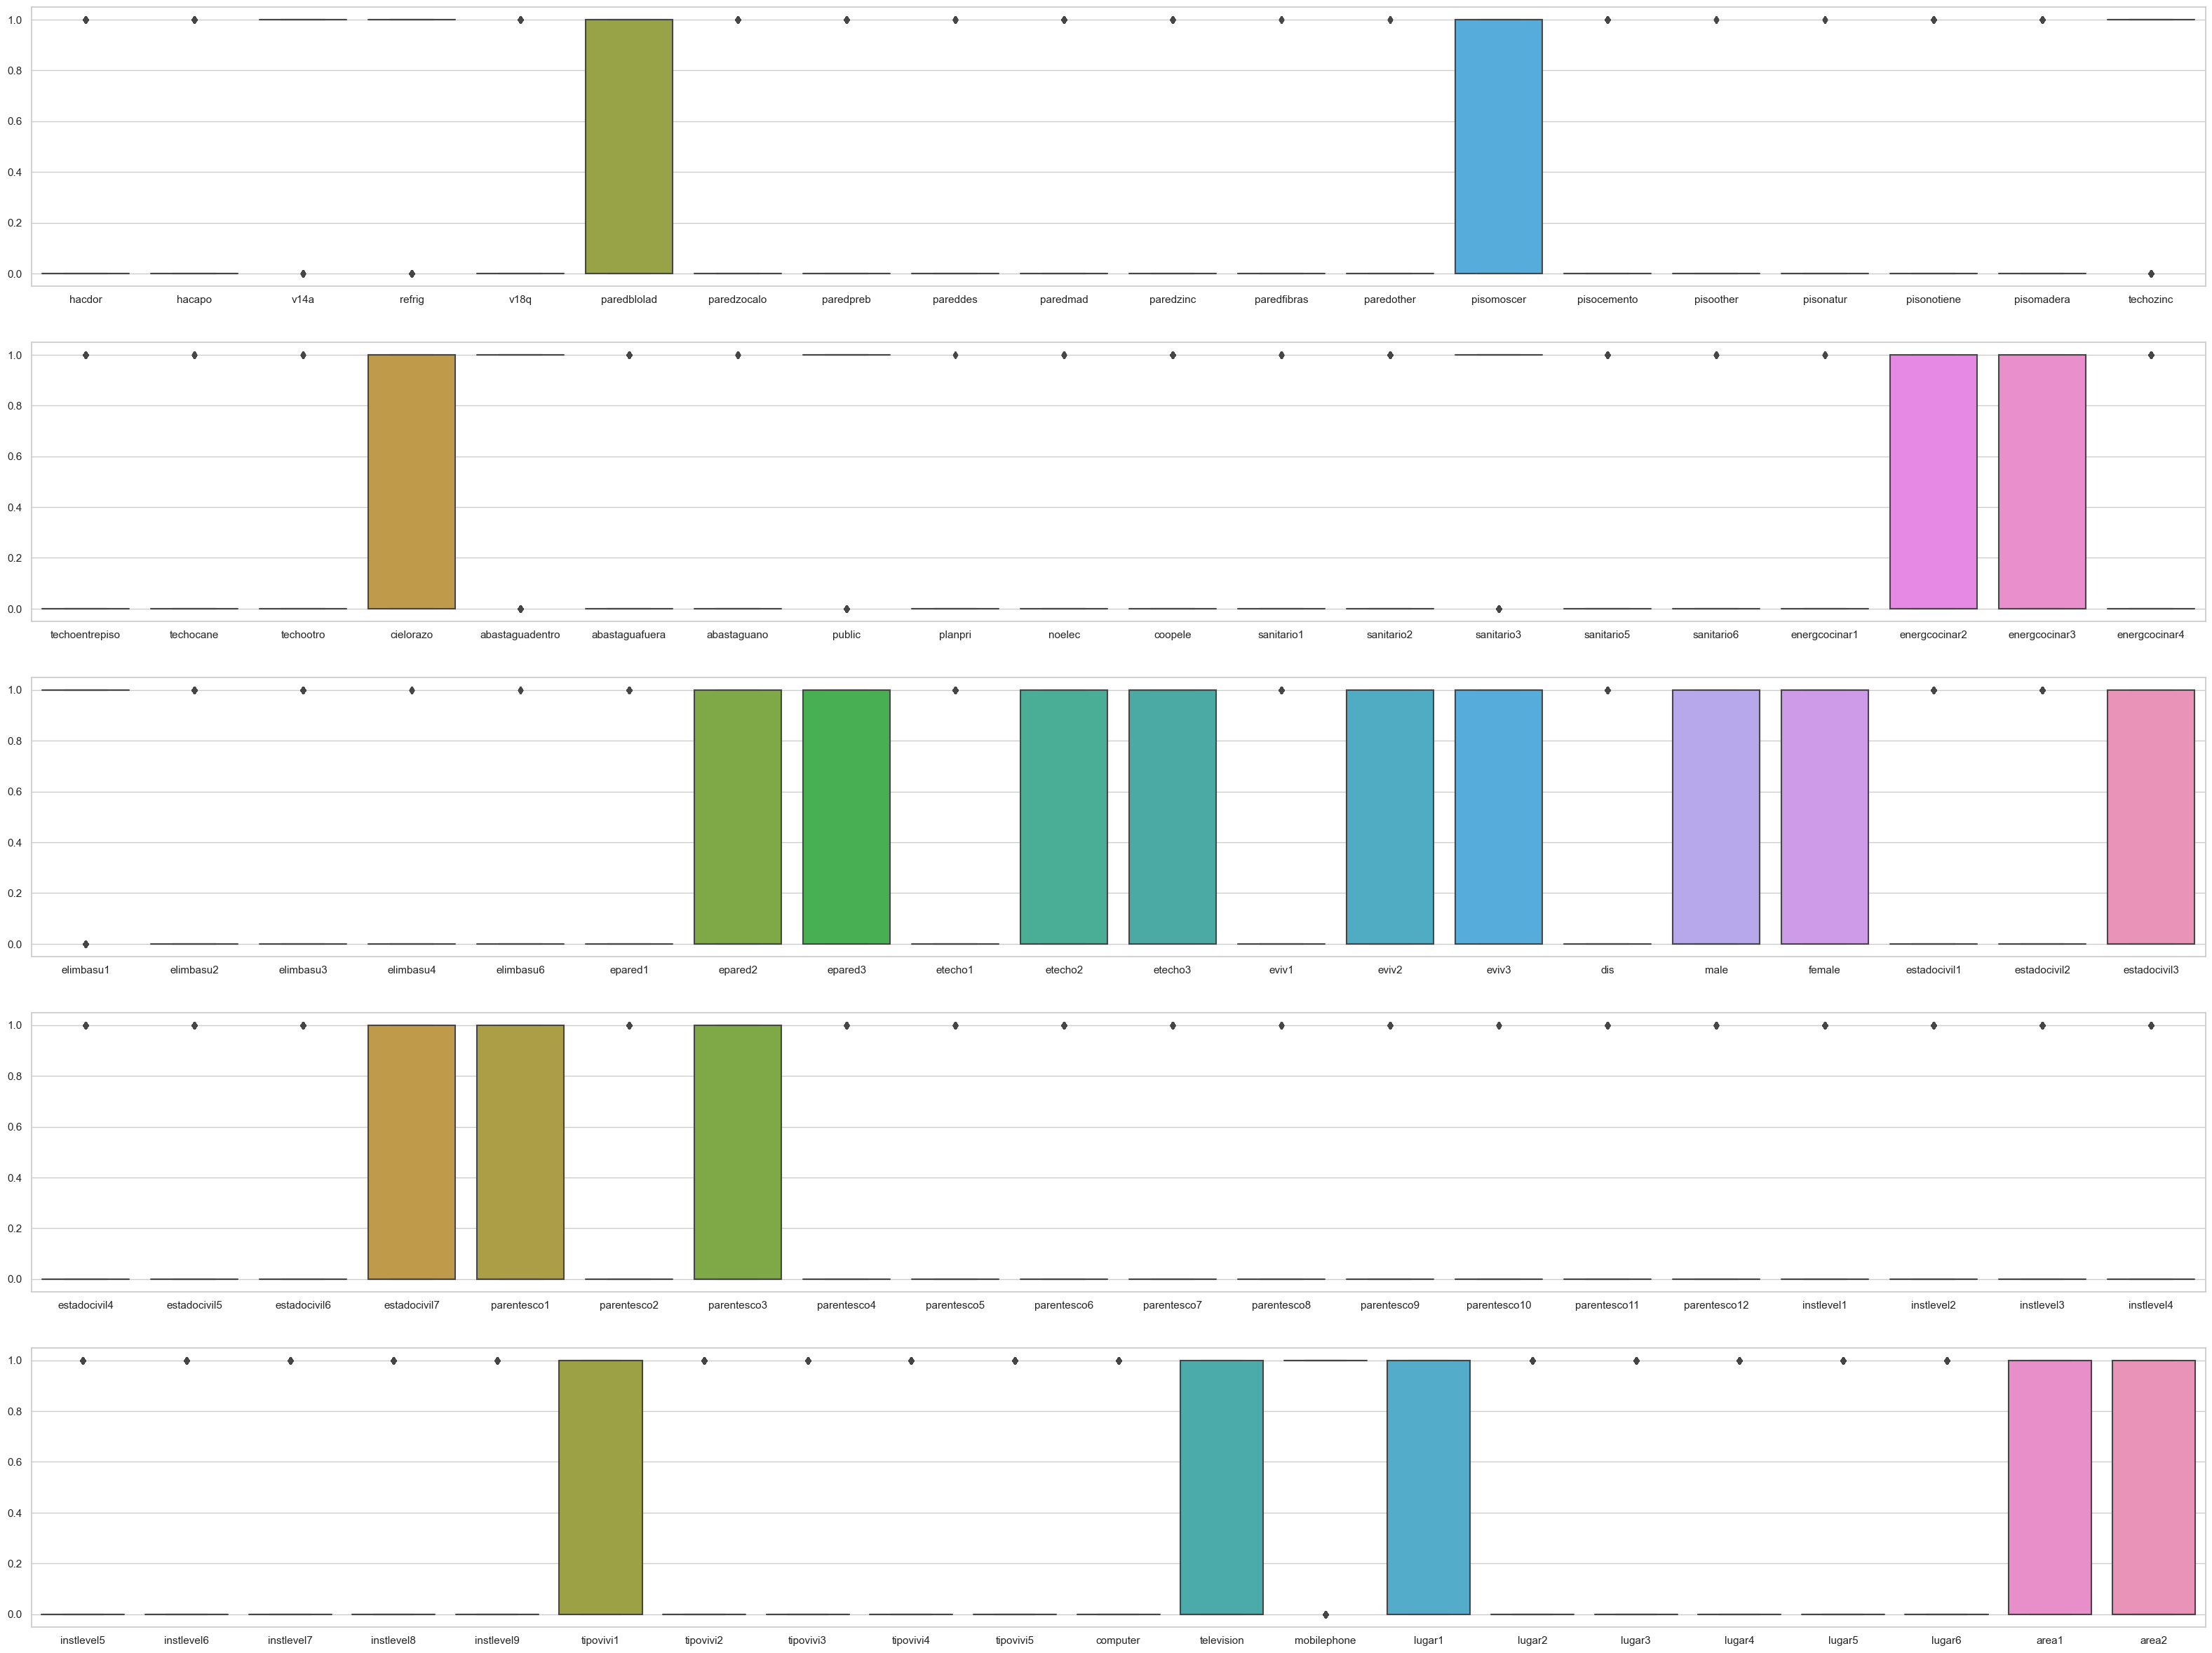

In [27]:
binary_feat, nonbinary_feat = get_binary_features(int_features_df)

int_features_set1 = int_features_df[binary_feat[:20]]
int_features_set2 = int_features_df[binary_feat[20:40]]
int_features_set3 = int_features_df[binary_feat[40:60]]
int_features_set4 = int_features_df[binary_feat[60:80]]
int_features_set5 = int_features_df[binary_feat[80:]]

fig, ax = plt.subplots(5, 1, figsize=(40, 30))

sns.boxplot(data=int_features_set1, ax=ax[0])
sns.boxplot(data=int_features_set2, ax=ax[1])
sns.boxplot(data=int_features_set3, ax=ax[2])
sns.boxplot(data=int_features_set4, ax=ax[3])
sns.boxplot(data=int_features_set5, ax=ax[4])


plt.show()

In [28]:
# Let's divide our non-binary features as per the mean of the features, so that we can visualize them better in boxplot 
int_features_df[nonbinary_feat].mean()

rooms                4.955530
r4h1                 0.385895
r4h2                 1.559171
r4h3                 1.945066
r4m1                 0.399184
r4m2                 1.661714
r4m3                 2.060898
r4t1                 0.785079
r4t2                 3.220885
r4t3                 4.005964
tamhog               3.999058
tamviv               4.094590
escolari             7.200272
hhsize               3.999058
elimbasu5            0.000000
hogar_nin            1.406613
hogar_adul           2.592445
hogar_mayor          0.284085
hogar_total          3.999058
bedrooms             2.739981
qmobilephone         2.821492
age                 34.303547
SQBescolari         74.222769
SQBage            1643.774302
SQBhogar_total      19.132887
SQBedjefe           53.500262
SQBhogar_nin         3.844826
agesq             1643.774302
Target               3.302292
dtype: float64

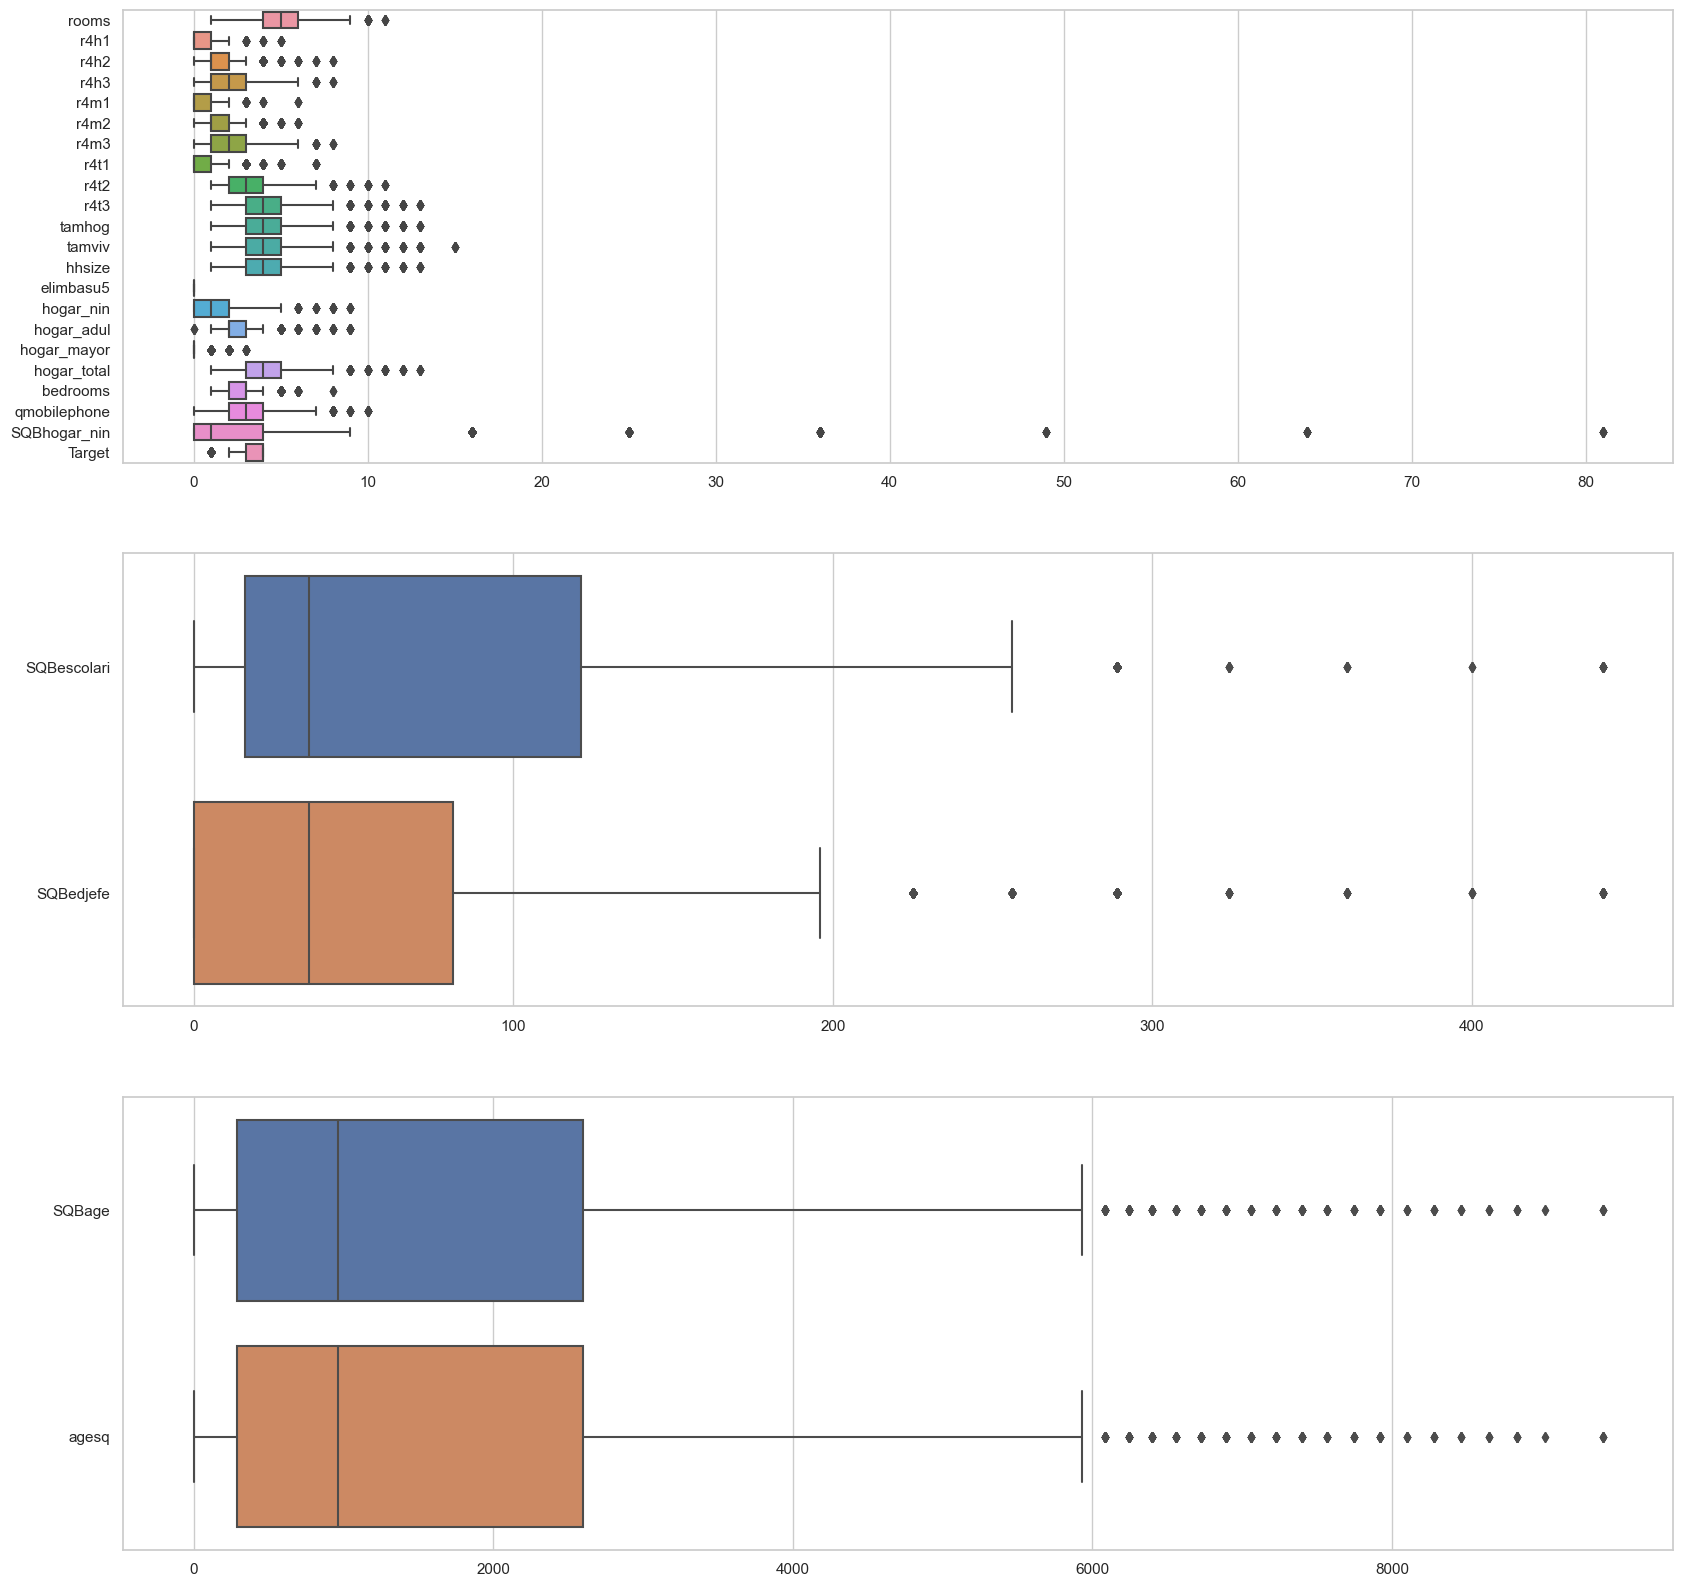

In [29]:
# As we can see our means range from 1-5, 50-100, 10000+. So we will set the ylimit for each of the features based on their mean value

nonbinary_feat_set1 = []
nonbinary_feat_set2 = []
nonbinary_feat_set3 = []

for feature in nonbinary_feat:
  if int_features_df[feature].mean() < 5.0:
    nonbinary_feat_set1.append(feature)
  elif  int_features_df[feature].mean() > 50 and int_features_df[feature].mean() < 100:
    nonbinary_feat_set2.append(feature)
  elif int_features_df[feature].mean() > 500:
    nonbinary_feat_set3.append(feature)
  else: continue

fig, ax = plt.subplots(3, 1, figsize=(20, 20))

ax[0].set_ylim(1, 5)
sns.boxplot(data=int_features_df[nonbinary_feat_set1], orient='h', ax=ax[0])

ax[1].set_ylim(50, 100)
sns.boxplot(data=int_features_df[nonbinary_feat_set2], orient='h', ax=ax[1])

ax[2].set_ylim(500, 2000)
sns.boxplot(data=int_features_df[nonbinary_feat_set3], orient='h', ax=ax[2])

plt.show()

In [30]:
from scipy.stats import iqr

def remove_outliers(df):
    for col in df.columns:
        IQR = iqr(df[col])
        Q1 = iqr(df[col], rng=[0, 25])
        Q3 = iqr(df[col], rng=[0, 75])        
        
        upp_lmt = Q3 + (1.5*IQR)
        low_lmt = Q1 - (1.5*IQR)
        
        for val in df[col]:
            if val < low_lmt:
                df[col].replace(to_replace=val, value=low_lmt, inplace=True)
            elif val > upp_lmt:
                df[col].replace(to_replace=val, value=upp_lmt, inplace=True) 

In [31]:
nonbinary_features_df = int_features_df[nonbinary_feat]
remove_outliers(nonbinary_features_df)

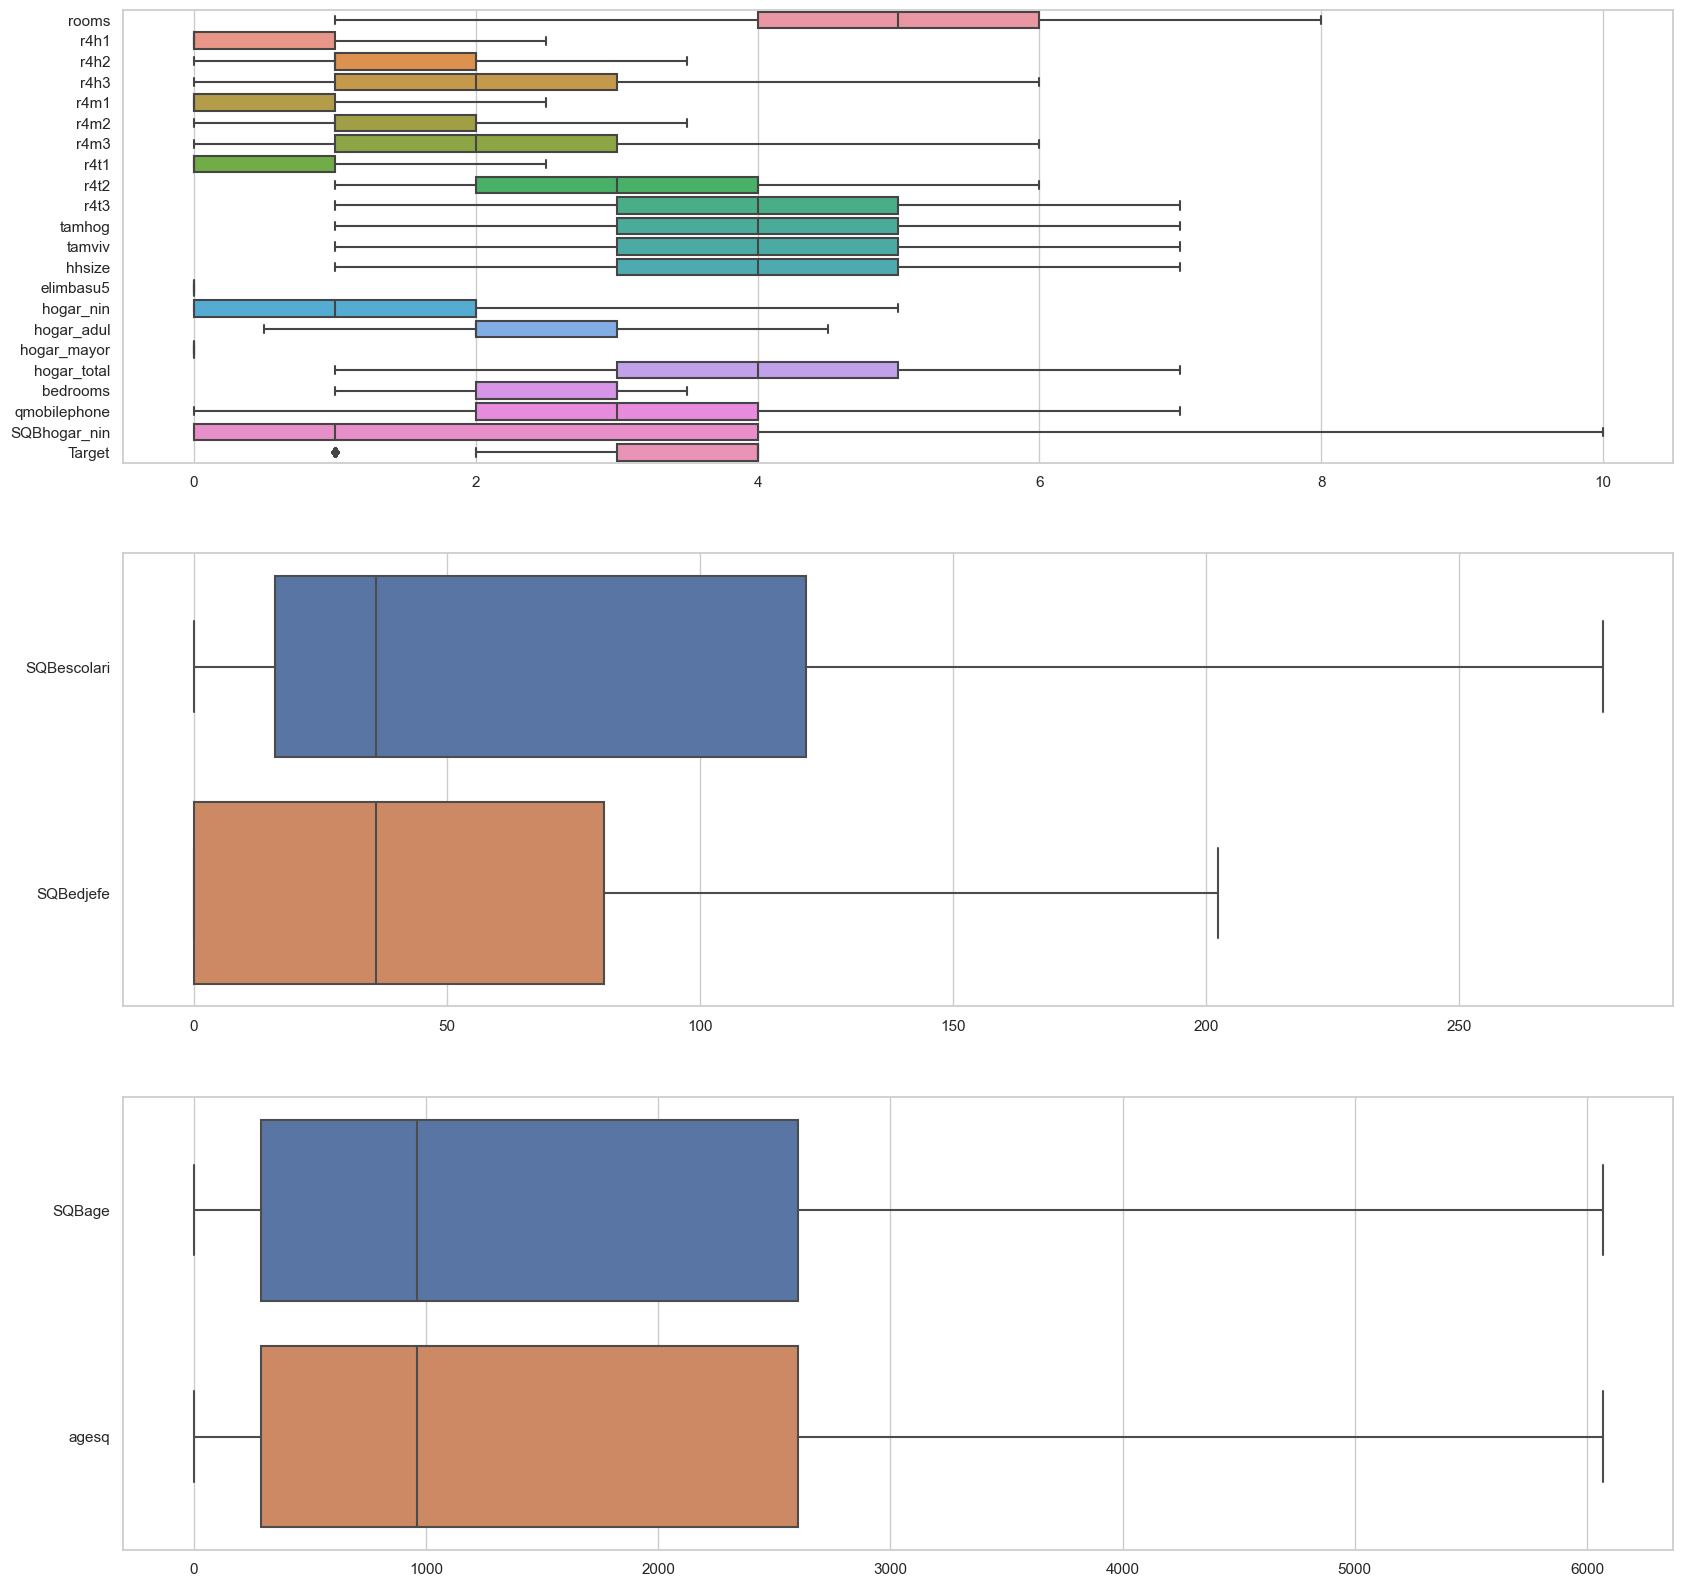

In [32]:
fig, ax = plt.subplots(3, 1, figsize=(20, 20))

ax[0].set_ylim(1, 5)
sns.boxplot(data=nonbinary_features_df[nonbinary_feat_set1], orient='h', ax=ax[0])

ax[1].set_ylim(50, 100)
sns.boxplot(data=nonbinary_features_df[nonbinary_feat_set2], orient='h', ax=ax[1])

ax[2].set_ylim(500, 2000)
sns.boxplot(data=nonbinary_features_df[nonbinary_feat_set3], orient='h', ax=ax[2])

plt.show()

In [33]:
# Mapping the numeric values to 'yes' and 'no'
values = {'yes': 1, 'no': 0}
obj_features_df.replace({'dependency': values, 'edjefe': values, 'edjefa': values}, inplace=True)

obj_features_df

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,0,10,0
1,ID_f29eb3ddd,0e5d7a658,8,12,0
2,ID_68de51c94,2c7317ea8,8,0,11
3,ID_d671db89c,2b58d945f,1,11,0
4,ID_d56d6f5f5,2b58d945f,1,11,0
...,...,...,...,...,...
9552,ID_d45ae367d,d6c086aa3,.25,9,0
9553,ID_c94744e07,d6c086aa3,.25,9,0
9554,ID_85fc658f8,d6c086aa3,.25,9,0
9555,ID_ced540c61,d6c086aa3,.25,9,0


In [34]:
train_df = pd.concat([float_features_df, int_features_df, obj_features_df], axis=1)
train_df

,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned,hacdor,rooms,hacapo,v14a,refrig,...,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target,Id,idhogar,dependency,edjefe,edjefa
0,10.00,1.000000,1.000000,0.0000,100.0000,0,3,0,1,1,...,1,100,0,1849,4,ID_279628684,21eb7fcc1,0,10,0
1,12.00,1.000000,1.000000,64.0000,144.0000,0,4,0,1,1,...,1,144,0,4489,4,ID_f29eb3ddd,0e5d7a658,8,12,0
2,11.00,0.500000,0.250000,64.0000,121.0000,0,8,0,1,1,...,1,0,0,8464,4,ID_68de51c94,2c7317ea8,8,0,11
3,11.00,1.333333,1.777778,1.0000,121.0000,0,5,0,1,1,...,16,121,4,289,4,ID_d671db89c,2b58d945f,1,11,0
4,11.00,1.333333,1.777778,1.0000,121.0000,0,5,0,1,1,...,16,121,4,1369,4,ID_d56d6f5f5,2b58d945f,1,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,8.25,1.250000,1.562500,0.0625,68.0625,0,6,0,1,1,...,25,81,1,2116,2,ID_d45ae367d,d6c086aa3,.25,9,0
9553,8.25,1.250000,1.562500,0.0625,68.0625,0,6,0,1,1,...,25,81,1,4,2,ID_c94744e07,d6c086aa3,.25,9,0
9554,8.25,1.250000,1.562500,0.0625,68.0625,0,6,0,1,1,...,25,81,1,2500,2,ID_85fc658f8,d6c086aa3,.25,9,0
9555,8.25,1.250000,1.562500,0.0625,68.0625,0,6,0,1,1,...,25,81,1,676,2,ID_ced540c61,d6c086aa3,.25,9,0


In [35]:
train_df.dropna(inplace=True)
train_df

,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned,hacdor,rooms,hacapo,v14a,refrig,...,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target,Id,idhogar,dependency,edjefe,edjefa
0,10.00,1.000000,1.000000,0.0000,100.0000,0,3,0,1,1,...,1,100,0,1849,4,ID_279628684,21eb7fcc1,0,10,0
1,12.00,1.000000,1.000000,64.0000,144.0000,0,4,0,1,1,...,1,144,0,4489,4,ID_f29eb3ddd,0e5d7a658,8,12,0
2,11.00,0.500000,0.250000,64.0000,121.0000,0,8,0,1,1,...,1,0,0,8464,4,ID_68de51c94,2c7317ea8,8,0,11
3,11.00,1.333333,1.777778,1.0000,121.0000,0,5,0,1,1,...,16,121,4,289,4,ID_d671db89c,2b58d945f,1,11,0
4,11.00,1.333333,1.777778,1.0000,121.0000,0,5,0,1,1,...,16,121,4,1369,4,ID_d56d6f5f5,2b58d945f,1,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,8.25,1.250000,1.562500,0.0625,68.0625,0,6,0,1,1,...,25,81,1,2116,2,ID_d45ae367d,d6c086aa3,.25,9,0
9553,8.25,1.250000,1.562500,0.0625,68.0625,0,6,0,1,1,...,25,81,1,4,2,ID_c94744e07,d6c086aa3,.25,9,0
9554,8.25,1.250000,1.562500,0.0625,68.0625,0,6,0,1,1,...,25,81,1,2500,2,ID_85fc658f8,d6c086aa3,.25,9,0
9555,8.25,1.250000,1.562500,0.0625,68.0625,0,6,0,1,1,...,25,81,1,676,2,ID_ced540c61,d6c086aa3,.25,9,0


Target variable composition: Counter({4: 5996, 2: 1597, 3: 1209, 1: 755})


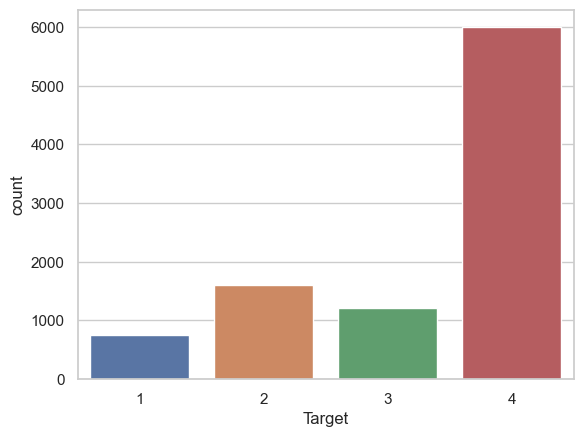

In [36]:
from collections import Counter

target_data_comp = Counter(nonbinary_features_df['Target'])
print(f'Target variable composition: {target_data_comp}')

sns.countplot(x='Target', data=nonbinary_features_df)
plt.show()

In [37]:
# As you can see we have imbalance in our dependent variable, hence it's an imbalanced dataset.
# Let's use SMOTE for rebalancing

from imblearn.over_sampling import SMOTE
import numpy as np

y = train_df['Target']
X = train_df.drop(['Id', 'idhogar', 'Target'], axis=1)

smote = SMOTE(k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X, y)

Counter({4: 5991, 2: 5991, 3: 5991, 1: 5991})


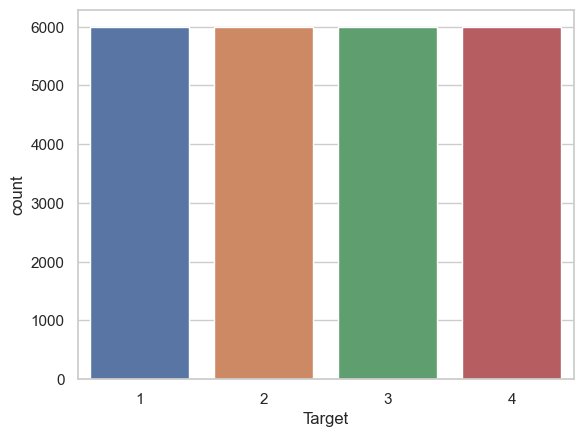

In [38]:
resample_target_comp = Counter(y_resampled)
print(resample_target_comp)

sns.countplot(y_resampled)
plt.show()

In [39]:
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
resampled_df

,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned,hacdor,rooms,hacapo,v14a,refrig,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,dependency,edjefe,edjefa,Target
0,10.000000,1.000000,1.000000,0.000000,100.000000,0,3,0,1,1,...,100,1849,1,100,0,1849,0.0,10.0,0.0,4
1,12.000000,1.000000,1.000000,64.000000,144.000000,0,4,0,1,1,...,144,4489,1,144,0,4489,8.0,12.0,0.0,4
2,11.000000,0.500000,0.250000,64.000000,121.000000,0,8,0,1,1,...,121,8464,1,0,0,8464,8.0,0.0,11.0,4
3,11.000000,1.333333,1.777778,1.000000,121.000000,0,5,0,1,1,...,81,289,16,121,4,289,1.0,11.0,0.0,4
4,11.000000,1.333333,1.777778,1.000000,121.000000,0,5,0,1,1,...,121,1369,16,121,4,1369,1.0,11.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23959,3.779118,2.262479,5.681156,4.000000,17.343385,0,4,0,1,1,...,14,2401,22,12,10,2401,2.0,2.541597,0.983361,3
23960,6.140880,2.140880,4.633959,0.713764,37.760998,0,4,0,1,1,...,0,0,18,0,3,0,0.662053,0.0,6.28176,3
23961,3.741992,1.383867,1.920957,1.909610,15.322947,0,5,0,1,1,...,0,18,13,1,4,18,1.303203,0.606406,2.09039,3
23962,8.372111,2.255778,5.278891,1.000000,70.139830,0,4,0,1,1,...,47,1156,21,36,4,1156,1.0,6.0,0.0,3


In [40]:
resampled_df['Target'].dtype

dtype('int64')

In [41]:
# Our dataset is now balanced. We can now train our model. Using hyper parameter tuning.
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

p_dist = {
  'n_estimators': np.arange(100, 900, 100), 
  'criterion': ['gini', 'entropy'], 
  'max_depth': np.arange(1, 15, 1), 
  'max_features': ['auto', 'sqrt', 'log2'] 
  }

rand_forest = RandomForestClassifier()

clf = RandomizedSearchCV(rand_forest, p_dist, n_jobs=-1, cv=10, random_state=32, verbose=1)


In [42]:
clf.fit(X_resampled, y_resampled)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800])},
                   random_state=32, verbose=1)

<p>We have found out our required hyperparameters for the Random Forest classifier. So let's now fit the classifier to our test data with the given hyperparameters.</p>

In [43]:
print(f'Parameters: {clf.best_params_}\nScore: {clf.best_score_}')

Parameters: {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 12, 'criterion': 'entropy'}
Score: 0.8288359719265108


In [44]:
# First we need to make the same transformations to the test dataset as the train dataset.

test_null_count, test_null_percent = null_counter(test_df)

data = {
  'Column_name': test_df.columns, 
  'Null_count': test_null_count, 
  'Null_percent': test_null_percent
}

null_info_df2 = pd.DataFrame.from_dict(data)

null_info_df2

,Column_name,Null_count,Null_percent
0,Id,0,0.00
1,v2a1,17403,72.95
2,hacdor,0,0.00
3,rooms,0,0.00
4,hacapo,0,0.00
...,...,...,...
137,SQBhogar_nin,0,0.00
138,SQBovercrowding,0,0.00
139,SQBdependency,0,0.00
140,SQBmeaned,31,0.13


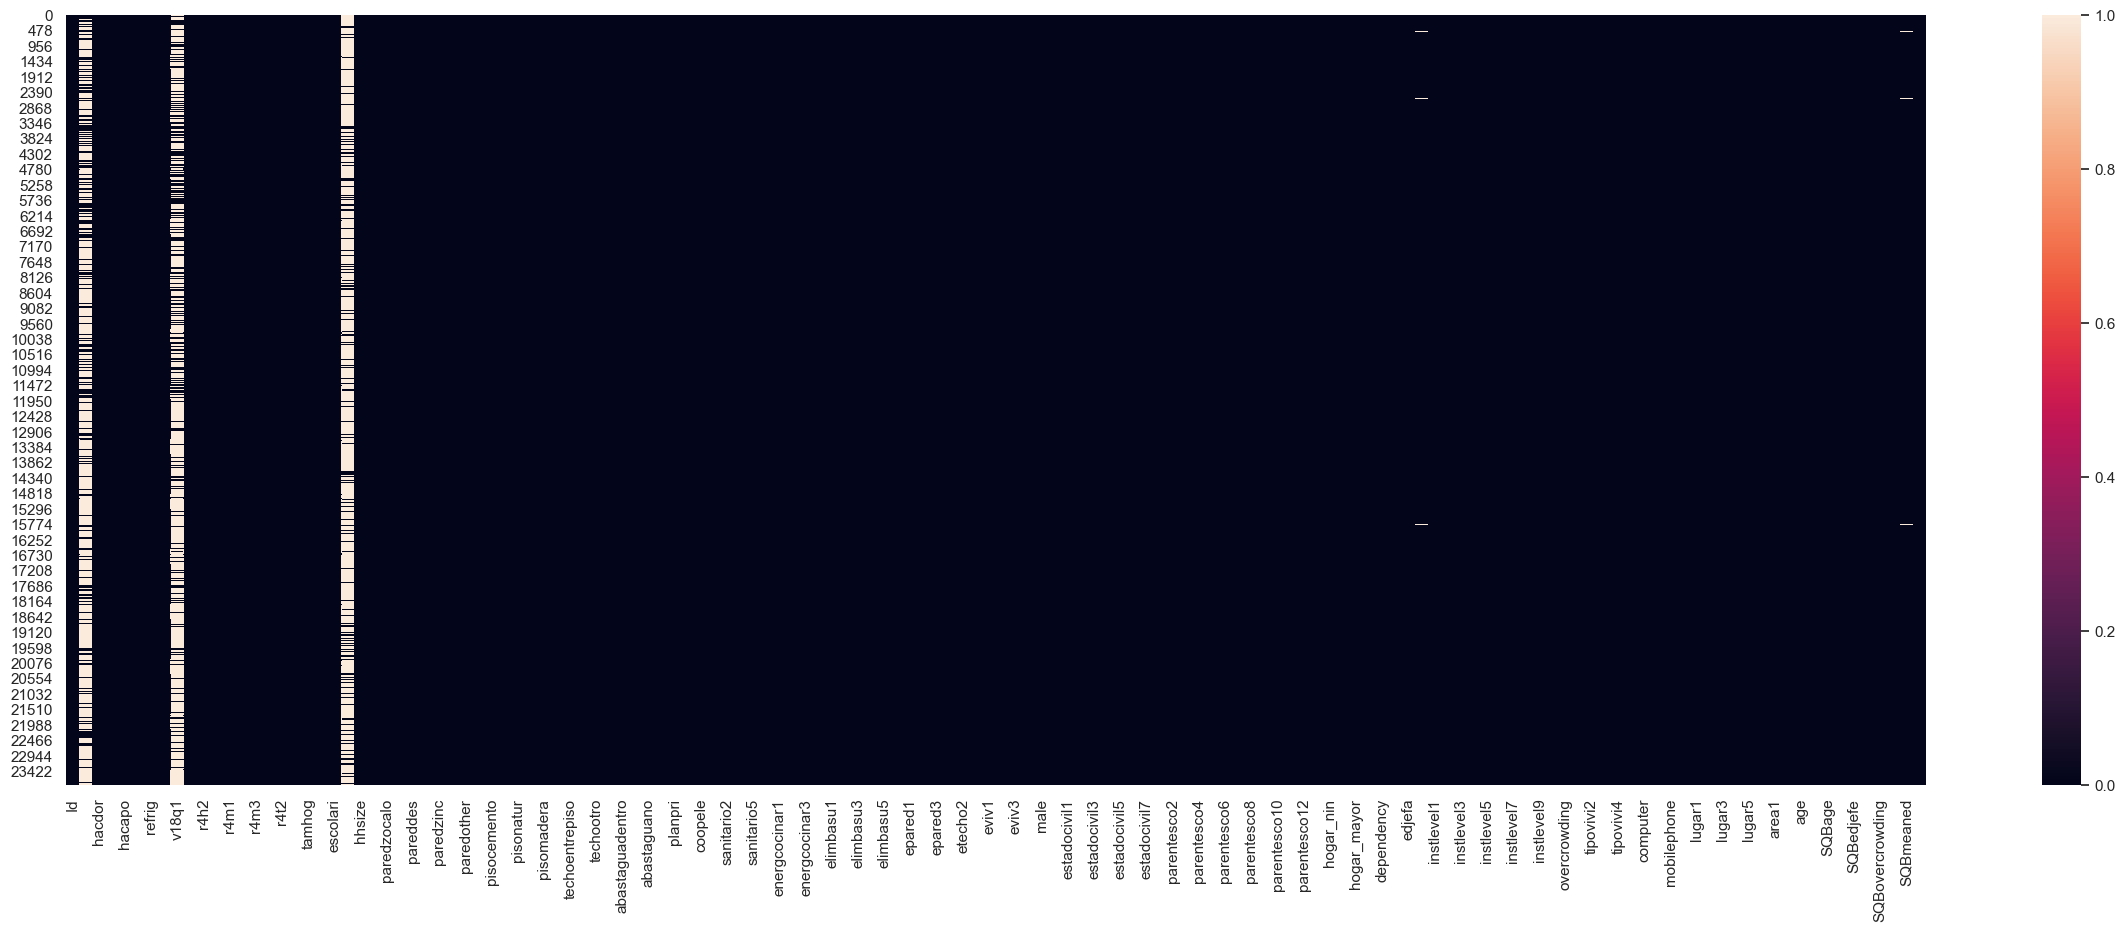

In [45]:
plt.figure(figsize=(30, 10))
sns.heatmap(test_df.isnull())
plt.show()

<p>From the above plot we can see that three features have high no. of null values. These features are:</p>
<ol>
  <li>v2a1 with 72.95%</li>
  <li>v18q1 with 75.82%</li>
  <li>rez_esc with 82.38%</li>
</ol>

<p>Since these three columns have high no. of missing values, hence, they will not contribute much to the model learning. So it would make no difference if we drop them.</p>


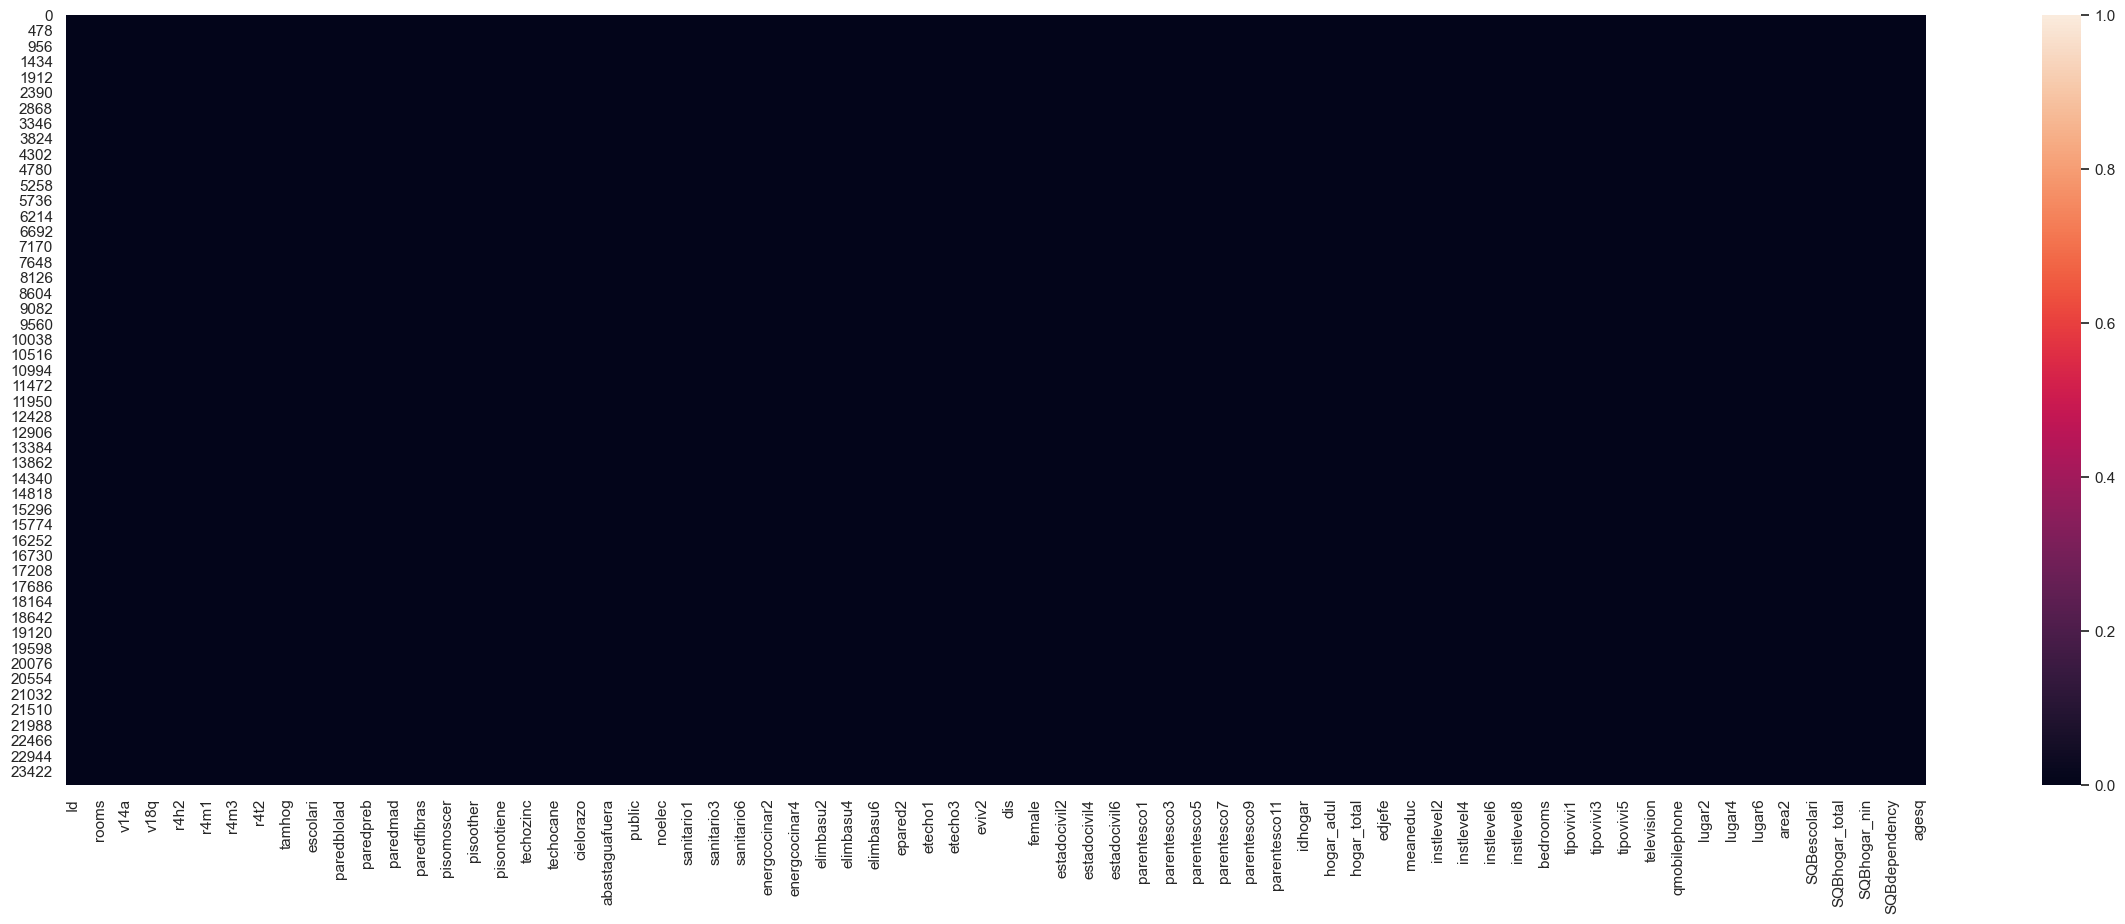

In [46]:
test_df = test_df.drop(['v2a1', 'v18q1', 'rez_esc'], axis=1)

plt.figure(figsize=(30, 10))
sns.heatmap(test_df.isnull())
plt.show()

In [47]:
test_df.dropna(inplace=True)

In [48]:
# Mapping the numeric values to 'yes' and 'no'
values = {'yes': 1, 'no': 0}
test_df.replace({'dependency': values, 'edjefe': values, 'edjefa': values}, inplace=True)

In [49]:
test_df.drop(['Id', 'idhogar'], axis=1, inplace=True)
test_df

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,0,5,0,1,1,0,1,1,2,0,...,4,0,16,9,0,1,2.25,0.25,272.2500,16
1,0,5,0,1,1,0,1,1,2,0,...,41,256,1681,9,0,1,2.25,0.25,272.2500,1681
2,0,5,0,1,1,0,1,1,2,0,...,41,289,1681,9,0,1,2.25,0.25,272.2500,1681
3,0,14,0,1,1,1,0,1,1,0,...,59,256,3481,1,256,0,1.00,0.00,256.0000,3481
5,0,3,0,1,1,1,0,0,0,0,...,38,256,1444,4,0,0,1.00,0.00,182.2500,1444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,1,2,1,1,1,0,0,2,2,1,...,10,9,100,36,25,4,36.00,0.25,33.0625,100
23852,0,3,0,1,1,0,0,1,1,0,...,54,36,2916,16,36,4,4.00,1.00,36.0000,2916
23853,0,3,0,1,1,0,0,1,1,0,...,12,16,144,16,36,4,4.00,1.00,36.0000,144
23854,0,3,0,1,1,0,0,1,1,0,...,12,25,144,16,36,4,4.00,1.00,36.0000,144


In [50]:
model = RandomForestClassifier(n_estimators=200,
                               max_features='sqrt',
                               max_depth=12,
                               criterion='entropy')

model.fit(X_resampled, y_resampled)

RandomForestClassifier(criterion='entropy', max_depth=12, max_features='sqrt',
                       n_estimators=200)

In [51]:
y_predict = model.predict(test_df)

y_predict

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [52]:
y_predict_srs = pd.Series(name='Prediction', data=y_predict)
y_predict_srs

0        2
1        2
2        2
3        1
4        1
        ..
23820    2
23821    2
23822    2
23823    2
23824    2
Name: Prediction, Length: 23825, dtype: int64